In [1]:
## import necessary libraries
import numpy as np
import pandas as pd

## read the raw data file
df = pd.read_csv('raw_data/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

# drop duplicates
df.drop_duplicates(inplace=True)

# convert data types
df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']] = df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  int64  
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  int64  
 15  

In [2]:
#slice the dataframe for feature and label
df_copy = df.copy(deep=True)
X, y = df_copy.iloc[:,1:], df_copy.iloc[:,0]
print(X.shape)
print(y.shape)

#get dummies
def get_dummies(X):

    # Identify discrete columns with more than 2 categories
    discrete_columns = [col for col in X.columns if X[col].nunique() > 2 and X[col].dtype != 'float64']

    # Create dummy variables for these columns
    df_with_dummies = pd.get_dummies(X, columns=discrete_columns, drop_first=True)

    return df_with_dummies
X = get_dummies(X)
X

(229781, 21)
(229781,)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,1,0,0,0,0,0,0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

## Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
## This is the baseline dummy classifier which classifies all as the majority class

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
y_dummy_prediction = dummy_majority.predict(X_test)

## calculate metrics
accuracy = accuracy_score(y_test, y_dummy_prediction)
precision = precision_score(y_test, y_dummy_prediction, average='macro')
recall = recall_score(y_test, y_dummy_prediction, average='macro')
f1 = f1_score(y_test, y_dummy_prediction, average='macro')
print('Unique predicted labels: ', (np.unique(y_dummy_prediction)))
print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

Unique predicted labels:  [0]
accuracy : 0.8288055008540686  precision : 0.2762685002846895 
 recall : 0.3333333333333333  f1 : 0.3021299970452513


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
## Standard scaling
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_train)
X_scaled_test = scalar.fit_transform(X_test)

In [14]:
# Moving forward with l2 logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Training the logistic regression model
clf = LogisticRegression(penalty='l2')

clf.fit(X_scaled, y_train)

# Making predictions
y_pred = clf.predict(X_scaled_test)
y_pred_proba = clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.8346262226235679  precision : 0.4635717254386112 
 recall : 0.3840520981044238  f1 : 0.39179133335513555


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = clf.predict(X_scaled_test)
y_pred_proba = clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8500    0.9746    0.9080     76178
           1     0.0000    0.0000    0.0000      1824
           2     0.5407    0.1776    0.2673     13911

    accuracy                         0.8346     91913
   macro avg     0.4636    0.3841    0.3918     91913
weighted avg     0.7863    0.8346    0.7931     91913



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


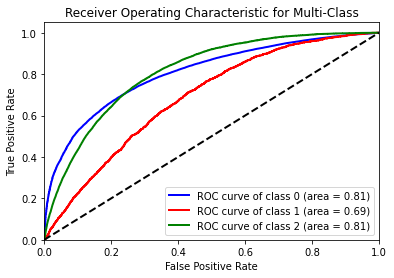

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [16]:
## we can see that the baseline model logistic regression perform poorly
## try KNN classifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Setting up the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_scaled, y_train)

# Making predictions
y_pred = knn.predict(X_scaled_test)
y_pred_proba = knn.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.8121049253098038  precision : 0.41812355687766023 
 recall : 0.37650879017541966  f1 : 0.38054216202005287


In [32]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = knn.predict(X_scaled_test)
y_pred_proba = knn.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

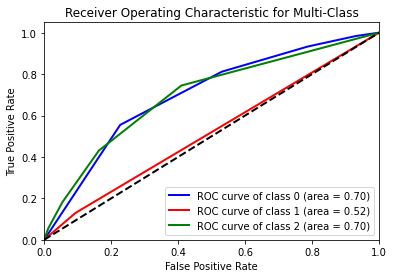

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = knn.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [17]:
## we can see that both logistic regression and KNN perform very poorly, lets try more models

## Decision trees
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_scaled, y_train)

# Making predictions
y_pred = tree_clf.predict(X_scaled_test)
y_pred_proba = tree_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.7425608999815042  precision : 0.3893459760277054 
 recall : 0.3936865924714177  f1 : 0.3911485819563835


In [ ]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = tree_clf.predict(X_scaled_test)
y_pred_proba = tree_clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

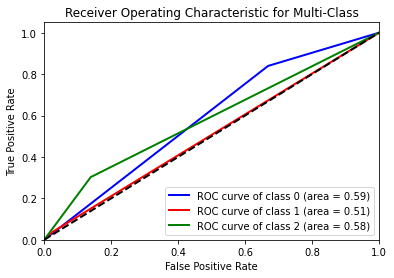

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = tree_clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [18]:
## implement the naive bayes algorithm

from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_scaled, y_train)

# Making predictions
y_pred = NB_clf.predict(X_scaled_test)
y_pred_proba = NB_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.6856919043008062  precision : 0.4150824984684313 
 recall : 0.46973873690335055  f1 : 0.4093965359532808


In [29]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = NB_clf.predict(X_scaled_test)
y_pred_proba = NB_clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9154    0.7004    0.7936     76178
           1     0.0362    0.0159    0.0221      1824
           2     0.2937    0.6929    0.4125     13911

    accuracy                         0.6857     91913
   macro avg     0.4151    0.4697    0.4094     91913
weighted avg     0.8038    0.6857    0.7206     91913



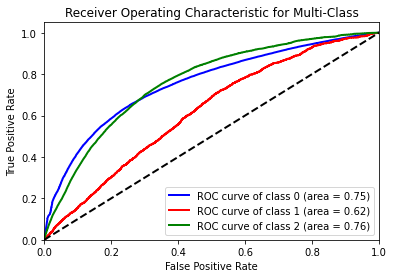

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = NB_clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [19]:
## random forest prediction

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
rf_clf.fit(X_scaled, y_train)

# Making predictions
y_pred = rf_clf.predict(X_scaled_test)
y_pred_proba = rf_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.8256938626744856  precision : 0.43722227245810813 
 recall : 0.3791277775764967  f1 : 0.3848129495521879


In [ ]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = rf_clf.predict(X_scaled_test)
y_pred_proba = rf_clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

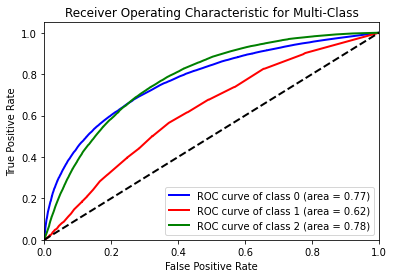

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = rf_clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [20]:
## gradient boosing decision trees (GBDT)
from sklearn.ensemble import GradientBoostingClassifier

GBDT_clf = GradientBoostingClassifier(n_estimators=300)
GBDT_clf.fit(X_scaled, y_train)

# Making predictions
y_pred = GBDT_clf.predict(X_scaled_test)
y_pred_proba = GBDT_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.8360188439067379  precision : 0.46742952966280865 
 recall : 0.3886469338780578  f1 : 0.39794023347873436


In [ ]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = GBDT_clf.predict(X_scaled_test)
y_pred_proba = GBDT_clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

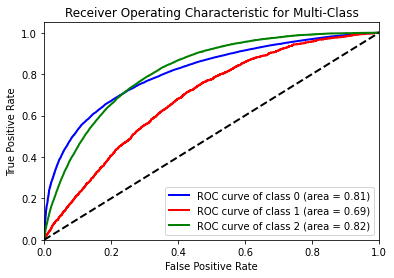

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = GBDT_clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=300)
ada_clf.fit(X_scaled, y_train)

# Making predictions
y_pred = ada_clf.predict(X_scaled_test)
y_pred_proba = ada_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.8356380490246211  precision : 0.46529169192354747 
 recall : 0.3909616369617985  f1 : 0.4007462396639669


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = ada_clf.predict(X_scaled_test)
y_pred_proba = ada_clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

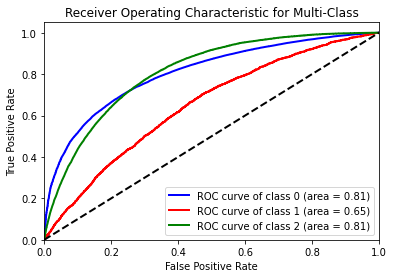

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = ada_clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # First hidden layer
        self.fc1 = nn.Linear(45, 64)
        # Second hidden layer
        self.fc2 = nn.Linear(64, 32)
        # Third hidden layer
        self.fc3 = nn.Linear(32, 16)
        # Output layer
        self.fc4 = nn.Linear(16, 3)

    def forward(self, x):
        # Apply ReLU activation function after each hidden layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # Apply softmax to the output layer
        x = F.softmax(self.fc4(x), dim=1)
        return x

In [17]:
from torch.utils.data import TensorDataset, DataLoader

# Assuming X and y are your features and labels respectively
# Convert your data to PyTorch tensors if they are not already

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.int64)

# Create a TensorDataset
dataset = TensorDataset(X_tensor, y_tensor)

# Create a DataLoader
batch_size = 183824  # You can adjust this according to your needs
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [18]:
from torch.utils.data import TensorDataset, DataLoader

# Assuming X and y are your features and labels respectively
# Convert your data to PyTorch tensors if they are not already

X_tensor_test = torch.tensor(X_scaled_test, dtype=torch.float32)
y_tensor_test = torch.tensor(y_test.to_numpy(), dtype=torch.int64)

# Create a TensorDataset
dataset = TensorDataset(X_tensor_test, y_tensor_test)

# Create a DataLoader
test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Create the neural network
model = NeuralNetwork()

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_predictions = []
    all_labels = []
    with torch.no_grad():  # No need to track gradients for evaluation
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    recall = recall_score(all_labels, all_predictions, average='macro')
    return recall

# Example training loop
for epoch in range(500):  # num_epochs is the number of times you go through the entire dataset
    # all_predictions = []
    # all_labels = []
    for batch in train_loader:  # data_loader is your PyTorch DataLoader with training data
        inputs, labels = batch
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Evaluate the model on the test set
    recall = evaluate_model(model, test_loader)
    print(f'Epoch {epoch+1}/500, Loss: {loss.item():.4f}, Macro Recall: {recall:.4f}')


    #     _, predicted = torch.max(outputs.data, 1)
    #     all_predictions.extend(predicted.cpu().numpy())
    #     all_labels.extend(labels.cpu().numpy())

    # # Calculate recall
    # recall = recall_score(all_labels, all_predictions, average='macro')
    # print(f'Epoch [{epoch+1}/{500}], Loss: {loss.item():.4f}, Recall: {recall:.4f}')

In [ ]:
## implement the naive bayes algorithm

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
NB_clf_GridCV = GaussianNB()
scores = cross_val_score(NB_clf_GridCV, X_train, y_train, cv=kf, scoring='f1_macro')